# Курсовая работа

Ссылки на соревнование на kaggle - это наш курсовой проект в этом курсе. На выбор есть 2 задачи:

https://www.kaggle.com/c/tutors-expected-math-exam-results) - предсказание среднего балла на ЕГЭ по математике, задача регрессии

https://www.kaggle.com/c/choose-tutors - предсказание вероятности того, что репетитор подходит студенту, задача бинарной классификации

Можно начинать ознакамливаться с задачами и начинать решать. Основное условие - использовать только алгоритмы собственной разработки (запрещены sklearn, xgboost, lightgbm, catboost... ). Разрешено использовать системные библиотеки и numpy.

In [1]:
import numpy as np
import pandas as pd
import random
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier

import matplotlib.pyplot as plt
import seaborn as sns

### предсказание среднего балла на ЕГЭ по математике, задача регрессии

In [18]:
df = pd.read_csv('train_t.csv')
df.head(2)

,Id,age,years_of_experience,lesson_price,qualification,physics,chemistry,biology,english,geography,history,mean_exam_points
0,0,40.0,0.0,1400.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,63.0
1,1,48.0,4.0,2850.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,86.0


In [19]:
df.set_index('Id', inplace=True)


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 11 columns):
age                    10000 non-null float64
years_of_experience    10000 non-null float64
lesson_price           10000 non-null float64
qualification          10000 non-null float64
physics                10000 non-null float64
chemistry              10000 non-null float64
biology                10000 non-null float64
english                10000 non-null float64
geography              10000 non-null float64
history                10000 non-null float64
mean_exam_points       10000 non-null float64
dtypes: float64(11)
memory usage: 1.2 MB


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000010A00808>,
      dtype=object)

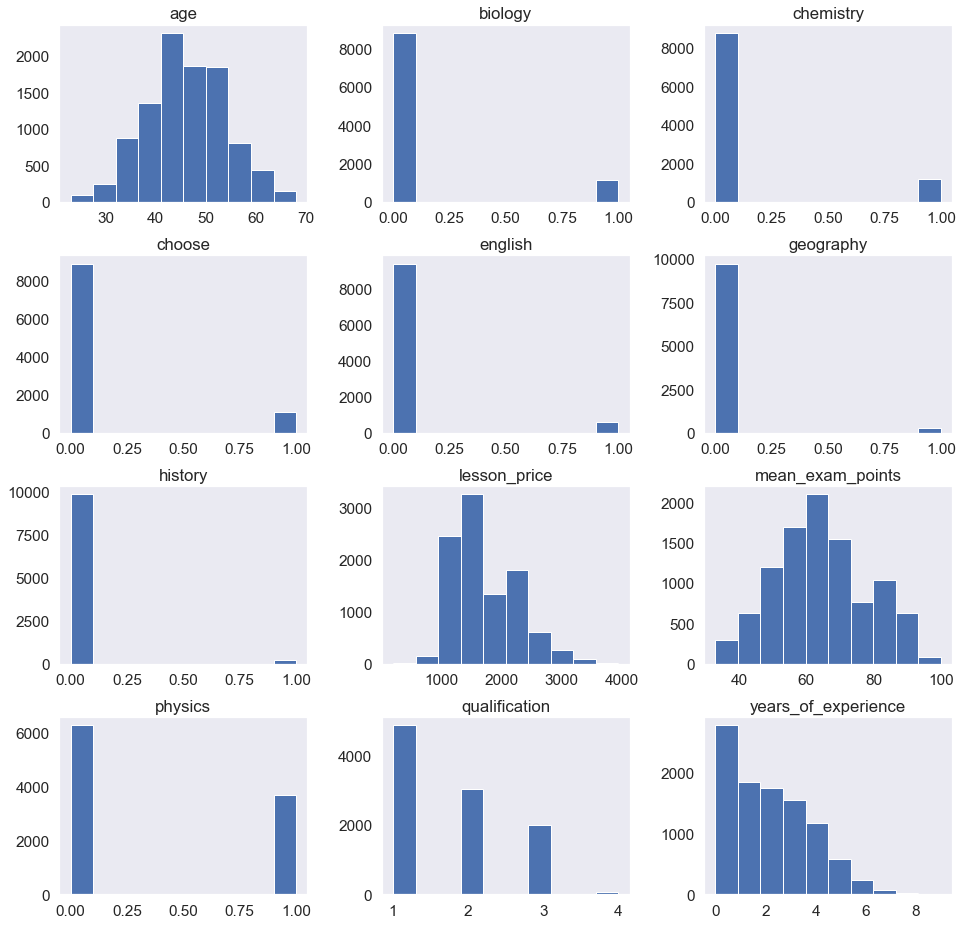

In [341]:
df.hist(figsize=(16,16), bins = 10, grid=False)

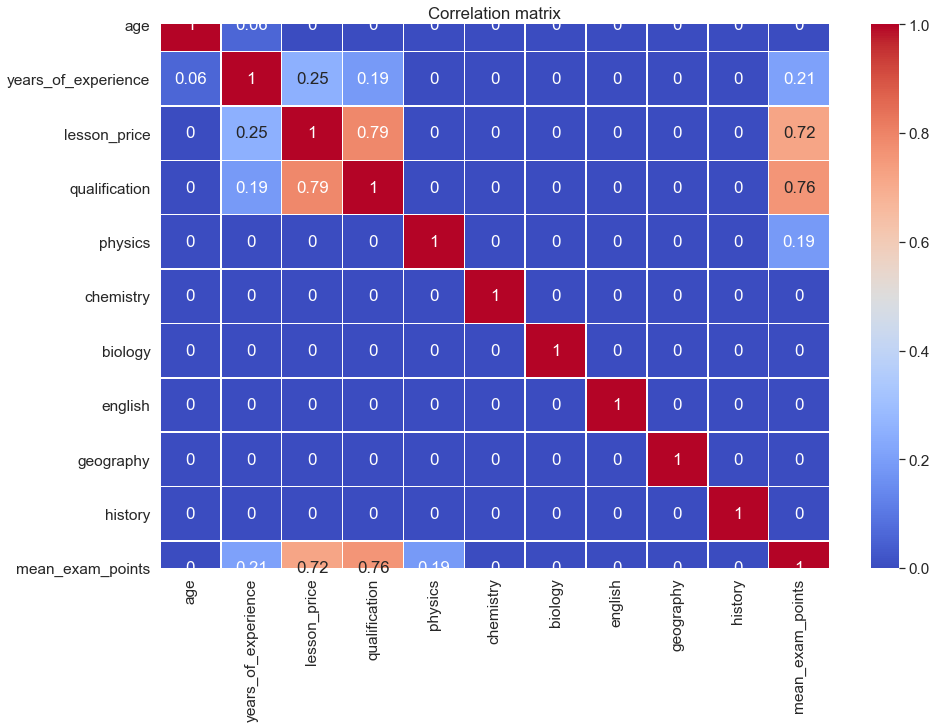

In [23]:
plt.figure(figsize = (15,10))

sns.set(font_scale=1.4)

corr_matrix = df.corr()
corr_matrix = np.round(corr_matrix, 2)
corr_matrix[np.abs(corr_matrix) < 0.05] = 0 

sns.heatmap(corr_matrix, annot=True, linewidths=.5, cmap='coolwarm')

plt.title('Correlation matrix')
plt.show()

Так как здесь видна линейная зависимость некоторых параметров можно попробовать построить линейную регрессию

In [304]:
y = df['mean_exam_points']
X = df.drop(['mean_exam_points'], axis = 1)

In [187]:
X.head()

,age,years_of_experience,lesson_price,qualification,physics,chemistry,biology,english,geography,history
Id,,,,,,,,,,
0,40.0,0.0,1400.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
1,48.0,4.0,2850.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0
2,39.0,0.0,1200.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,46.0,5.0,1400.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,43.0,1.0,1500.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [286]:
X.describe()

,age,years_of_experience,lesson_price,qualification,physics,chemistry,biology,english,geography,history
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,45.878000,1.986800,1699.105000,1.719500,0.375000,0.132900,0.109600,0.053700,0.032100,0.019400
std,8.043929,1.772213,524.886654,0.792264,0.484147,0.339484,0.312406,0.225436,0.176274,0.137933
min,23.000000,0.000000,200.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,40.000000,0.000000,1300.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,46.000000,2.000000,1500.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,51.000000,3.000000,2150.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,68.000000,10.000000,3950.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [75]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 10 columns):
age                    10000 non-null float64
years_of_experience    10000 non-null float64
lesson_price           10000 non-null float64
qualification          10000 non-null float64
physics                10000 non-null float64
chemistry              10000 non-null float64
biology                10000 non-null float64
english                10000 non-null float64
geography              10000 non-null float64
history                10000 non-null float64
dtypes: float64(10)
memory usage: 1.2 MB


In [292]:
# X['lesson_price'] = (X['lesson_price'] - X['lesson_price'].mean())/X['lesson_price'].std()

In [293]:
X[numerical]

,age,years_of_experience,lesson_price,qualification
Id,,,,
0,40.0,0.0,-0.569847,1.0
1,48.0,4.0,2.192654,3.0
2,39.0,0.0,-0.950881,1.0
3,46.0,5.0,-0.569847,1.0
4,43.0,1.0,-0.379330,1.0
...,...,...,...,...
9995,44.0,0.0,0.001705,2.0
9996,51.0,0.0,0.001705,2.0
9997,34.0,1.0,-0.855623,1.0


In [58]:
def scoreR2(y_pred,y):
    return (1 - (sum((y_pred-y)**2))/sum((y-y.mean())**2))


In [228]:
def std(y_pred,y):
    return ((sum((y_pred-y)**2)/len(y))**(1/2))

In [61]:
y2 = y+1

sum((y-y.mean())**2)

1832272.553599963

In [127]:
class LinearReg:
    def __init__(self,iterations, alpha = 1e-4):
        self.iterations = iterations
        self.alpha = alpha
        self.W = None
       
    def transform(self, X , numerical):
        for ind in numerical:
            X[ind] = (X[ind] - X[ind].mean())/X[ind].std()

    def fit(self, X1, y):
        X = np.array(X1).T
        self.W = np.random.randn(X.shape[0])
        n = X.shape[1]
        for i in range(1, self.iterations+1):
            y_pred = np.dot(self.W, X)
            self.W -= (self.alpha * (1/n * 2 * np.dot((y_pred - y), X.T)))
    
    def predict(self,X1):
        X = np.array(X1).T
        return np.dot(self.W, X)
        



In [93]:
numerical = list(X.columns)[:4]
numerical

['age', 'years_of_experience', 'lesson_price', 'qualification']

In [253]:
params = ['age','years_of_experience','lesson_price', 'qualification','physics']

In [294]:
model_lr = LinearReg(iterations = 10000, alpha = 1e-4)

In [233]:
model_lr.transform(X,numerical)


In [295]:
model_lr.fit(X[params],y)

In [296]:
y_pred = model_lr.predict(X[params])
y_pred, y

(array([48.60411961, 89.78091692, 42.78723513, ..., 42.49303673,
        38.77679588, 40.93224532]), Id
 0       63.0
 1       86.0
 2       53.0
 3       56.0
 4       59.0
         ... 
 9995    78.0
 9996    64.0
 9997    58.0
 9998    51.0
 9999    59.0
 Name: mean_exam_points, Length: 10000, dtype: float64)

In [297]:
scoreR2(y_pred,y)

0.2823742278118099

In [298]:
std(y_pred,y)

11.466847893542498

In [177]:
from sklearn.datasets import make_regression
from matplotlib import pyplot
X, y = make_regression(n_samples=100, n_features=5, noise=20)
X.shape,y.shape

((100, 5), (100,))

In [ ]:
# Вывод: линейная регрессия работает плохо (при других параметрах R2 вообще отрицательные значения получаются)

 ### предсказание вероятности того, что репетитор подходит студенту, задача бинарной классификации

In [366]:
# Реализуем класс узла

class Node:
    
    def __init__(self, index, t, true_branch, false_branch):
        self.index = index  # индекс признака, по которому ведется сравнение с порогом в этом узле
        self.t = t  # значение порога
        self.true_branch = true_branch  # поддерево, удовлетворяющее условию в узле
        self.false_branch = false_branch  # поддерево, не удовлетворяющее условию в узле

# И класс терминального узла (листа)

class Leaf:
    
    def __init__(self, data, labels):
        self.data = data
        self.labels = labels
        self.prediction = self.predict()
        
    def predict(self):
        classes = {}  # сформируем словарь "класс: количество объектов"
        for label in self.labels:
            if label not in classes:
                classes[label] = 0
            classes[label] += 1
        #  найдем класс, количество объектов которого будет максимальным в этом листе и вернем его    
        prediction = max(classes, key=classes.get)
        return prediction
    
#         z = np.mean(self.labels)
#         return 1 / (1 + np.exp(-z))
    

In [367]:
class DecisionTree:
    
    def __init__(self, min_leaf = 5, max_depth = 64, criterion = 'gini'):
        self.min_leaf = min_leaf
        self.max_depth = max_depth
        self.criterion = criterion
        
        self.current_depth = 0
    
    # Расчет критерия

    def calc_criterion(self,labels):
        #  подсчет количества объектов разных классов
        classes = {}
        for label in labels:
            if label not in classes:
                classes[label] = 0
            classes[label] += 1

        #  расчет критерия
        if self.criterion == 'gini':
            criter = 1
            for label in classes:
                p = classes[label] / len(labels)
                criter -= p ** 2
#            print('gini', criter)
        elif self.criterion == 'entropy':
            criter = 0
            for label in classes:
                p = classes[label] / len(labels)
                criter -= p * np.log2(p)
#            print('entropy',criter)
        return criter
        
    # Расчет качества
    def quality(self, true_labels, false_labels, criter):        
        # доля выборки, ушедшая в левое поддерево
        p = float(true_labels.shape[0]) / (true_labels.shape[0] + false_labels.shape[0])
        return criter - p * self.calc_criterion(true_labels) - (1 - p) * self.calc_criterion(false_labels)         
        
    # Разбиение датасета в узле
    def split(self, data, labels, index, t):

        left = np.where(data[:, index] <= t)
        right = np.where(data[:, index] > t)

        true_data = data[left]
        false_data = data[right]
        true_labels = labels[left]
        false_labels = labels[right]

        return true_data, false_data, true_labels, false_labels 
    
    def get_subsample(self, n_features):
        # будем сохранять не сами признаки, а их индексы
        sample_indexes = [i for i in range(n_features)]

        len_subsample = int(np.sqrt(n_features))
        subsample = []

        random.shuffle(sample_indexes)
        for _ in range(len_subsample):
            subsample.append(sample_indexes.pop())

        return subsample
        
    # Нахождение наилучшего разбиения
    def find_best_split(self, data, labels):

        criter = self.calc_criterion(labels)

        best_quality = 0
        best_t = None
        best_index = None
        
        n_features = data.shape[1]
        
        # выбор индекса из подвыборки длиной sqrt(n_features)
        subsample = self.get_subsample(n_features)
        
        for index in subsample:
            # будем проверять только уникальные значения признака, исключая повторения
            t_values = np.unique([row[index] for row in data])

            for t in t_values:
                true_data, false_data, true_labels, false_labels = self.split(data, labels, index, t)
                #  пропускаем разбиения, в которых в узле остается менее min_leaf объектов
                if len(true_data) < self.min_leaf or len(false_data) < self.min_leaf:
                    continue

                current_quality = self.quality(true_labels, false_labels, criter)

                #  выбираем порог, на котором получается максимальный прирост качества
                if current_quality > best_quality:
                    best_quality, best_t, best_index = current_quality, t, index

        return best_quality, best_t, best_index
        
    # Построение дерева с помощью рекурсивной функции
    def build_tree(self, data, labels): 

        quality, t, index = self.find_best_split(data, labels)        

        #  Базовый случай - прекращаем рекурсию, когда нет прироста в качества
        if quality == 0:
            return Leaf(data, labels)
        
        # или когда достигаем максимальной глубины
        if self.current_depth <= self.max_depth:
            return Leaf(data, labels)
        
        true_data, false_data, true_labels, false_labels = self.split(data, labels, index, t)        

        # Рекурсивно строим два поддерева
        true_branch = self.build_tree(true_data, true_labels)
        false_branch = self.build_tree(false_data, false_labels)
        
        self.current_depth += 1

        # Возвращаем класс узла со всеми поддеревьями, то есть целого дерева        
        return Node(index, t, true_branch, false_branch)
    
    def classify_object(self, obj, node):
        #  Останавливаем рекурсию, если достигли листа
        if isinstance(node, Leaf):
            answer = node.prediction
            return answer

        if obj[node.index] <= node.t:
            return self.classify_object(obj, node.true_branch)
        else:
            return self.classify_object(obj, node.false_branch)

    def fit(self, data, labels):
        self.my_tree = self.build_tree(data, labels)
        
    def predict(self, data):        
        classes = []
        for obj in data:
            prediction = self.classify_object(obj, self.my_tree)        
            classes.append(prediction)
        return classes    

In [371]:
class RandomForest:
    def __init__(self, min_leaf, criterion, n_trees):
        self.n_trees = n_trees
        self.min_leaf = min_leaf
        self.criterion = criterion        
        self.forest = None

    def get_bootstrap(self, data, labels, N):
        n_samples = data.shape[0]
        bootstrap = []

        for i in range(N):
            b_data = np.zeros(data.shape)
            b_labels = np.zeros(labels.shape)

            for j in range(n_samples):
                sample_index = random.randint(0, n_samples - 1)
                b_data[j] = data[sample_index]
                b_labels[j] = labels[sample_index]
            bootstrap.append((b_data, b_labels))

        return bootstrap        

    def fit(self, data1, labels):
        data = np.array(data1)
        self.forest = []
        bootstrap = self.get_bootstrap(data, labels, self.n_trees)

        for b_data, b_labels in bootstrap:
            tree = DecisionTree(min_leaf = self.min_leaf, max_depth = 64, criterion=self.criterion)
            tree.fit(b_data, b_labels)
            self.forest.append(tree)

        return self.forest

    def predict(self, data1):
        data = np.array(data1)

        # добавим предсказания всех деревьев в список
        predictions = []

        for tree in self.forest:
            predictions.append(tree.predict(data))

        # сформируем список с предсказаниями для каждого объекта
        predictions_per_object = list(zip(*predictions))

        # выберем в качестве итогового предсказания для каждого объекта то,
        # за которое проголосовало большинство деревьев
        voted_predictions = []
        for obj in predictions_per_object:
            voted_predictions.append(max(set(obj), key=obj.count))

        return voted_predictions

In [340]:
df = pd.read_csv('train_ct.csv')
df.set_index('Id', inplace=True)
df.head()

,age,years_of_experience,lesson_price,qualification,physics,chemistry,biology,english,geography,history,mean_exam_points,choose
Id,,,,,,,,,,,,
0,35.0,0.0,2150.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,74.0,0
1,52.0,2.0,1250.0,2.0,1.0,0.0,1.0,0.0,0.0,1.0,57.0,1
2,29.0,3.0,1750.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,66.0,0
3,33.0,3.0,1050.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,66.0,1
4,46.0,3.0,2250.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,73.0,0


In [342]:
y = df['choose']
X = df.drop(['choose'], axis = 1)

In [373]:
model_RF = RandomForest(min_leaf = 12, criterion = 'entropy', n_trees = 10)
model_RF.fit(X,y)
y_pred = model_RF.predict(X)
sum(y_pred), sum(y)

(0.0, 1109)

In [375]:
# почему то выдает везде предсказания 0, если меняю меняю вычисление Листа на функцию - 
# все равно среднее получается по всем предсказаниям одинаковое